In [1]:
import os
import numpy

In [2]:
import matplotlib.pyplot as plt

In [3]:
MCD_landcover_npy = r'D:\PhD_Workspace\MISR_AHI_WS\240111\analysis\reference\MCD12Q1.006.LC.AHI01km\MCD12Q1.006.LC.AHI01km.npy'

In [4]:
mcd_landcover = numpy.load(MCD_landcover_npy)

In [5]:
mcd_landcover.shape

(12000, 12000)

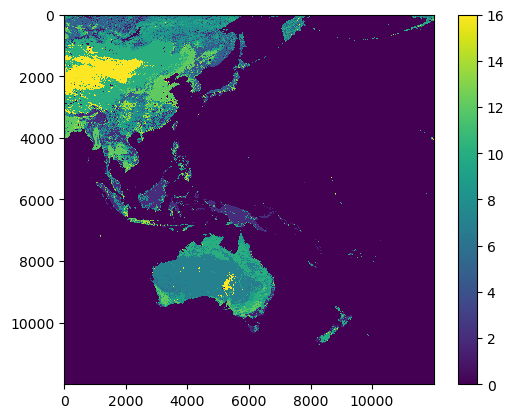

In [6]:
plt.imshow(mcd_landcover, interpolation='None')
plt.colorbar()

In [7]:
pixel_res = 0.01
ahi_llon = 85.0
ahi_llat = 60.0

# MCD12Q1 labels
lc_labels = [
    'Water', 'Evergreen Needleleaf Forest', 'Evergreen Broadleaf Forest', 'Deciduous Needleleaf Forest', 'Deciduous Broadleaf Forest', 'Mixed Forests', 'Closed Shrublands', 'Open Shrublands', 'Woody Savannas', 'Savannas', 'Grasslands',
    'Permanent Wetlands', 'Croplands', 'Urban and Built-Up', 'Cropland/Natual Vegation', 'Snow and Ice', 'Barren'
]

### Terra/MISR

In [8]:
npy_folder = r'D:\PhD_Workspace\MISR_AHI_WS\240113\analysis'
match_type_list = ['RAY']
for match_type in match_type_list:
    npy_file = 'MISR_'+match_type+'-matched_loc_count_10km_land.npy'
    npy_filename = os.path.join(npy_folder, npy_file)
    loc_record = numpy.load(npy_filename)
    lc_counts = numpy.zeros((17, ))
    for record_item in loc_record:
        loc_lon = float(record_item[0])
        loc_lat = float(record_item[1])
        lon_idx = int((loc_lon - ahi_llon)/pixel_res)
        lat_idx = int((ahi_llat - loc_lat)/pixel_res)
        landcover_idx = int(mcd_landcover[lat_idx][lon_idx])
        lc_counts[landcover_idx] = lc_counts[landcover_idx]+1
    lc_counts = lc_counts.astype(int).astype(str)

    print(match_type)        
    for idx in range(len(lc_labels)):
        print(lc_labels[idx], int(lc_counts[idx]))
    print('')

RAY
Water 41
Evergreen Needleleaf Forest 76
Evergreen Broadleaf Forest 355
Deciduous Needleleaf Forest 45
Deciduous Broadleaf Forest 207
Mixed Forests 397
Closed Shrublands 160
Open Shrublands 4908
Woody Savannas 483
Savannas 417
Grasslands 1497
Permanent Wetlands 39
Croplands 136
Urban and Built-Up 11
Cropland/Natual Vegation 4
Snow and Ice 2
Barren 33

